# **PREDICTION OF SUCCESSFUL TERRORIST ATTACK AND REGION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install colorama

### **IMPORTING NECCESARY LIBRARIES**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
plt.style.use('seaborn')
from colorama import Style, Fore, Back
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

LOADING GLOBAL TERRORISM DATASET

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Hamoye/globalterrorismdb_0718dist.csv",  encoding = 'latin1')

In [ ]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### **DATA CLEANING AND EXPLORATORY DATA ANALYSIS **

In [ ]:
#CHECKING FOR THE NUMBER OF FEATURES
df.shape

(181691, 135)

PROCEDURE Due to the large number of features present in the dataset, for us to see all columns and understand the feaures properly we would split the dataset into seven groups, then call the df.columns, df.nunique(), df.corr(),df.isna().sum() functions and plot the heapmap for each group. This will provide us with information regarding the redundant features that needs to be dropped.

In [ ]:
#FIRST GROUP
df1 = df.iloc[:,0:21]
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1


In [ ]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2'],
      dtype='object')

In [ ]:
df1.nunique()

eventid        181691
iyear              47
imonth             13
iday               32
approxdate       2244
extended            2
resolution       1859
country           205
country_txt       205
region             12
region_txt         12
provstate        2855
city            36674
latitude        48322
longitude       48039
specificity         5
vicinity            3
location        44109
summary        112492
crit1               2
crit2               2
dtype: int64

In [ ]:
#checking for missing data
df1.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
approxdate     172452
extended            0
resolution     179471
country             0
country_txt         0
region              0
region_txt          0
provstate         421
city              434
latitude         4556
longitude        4557
specificity         6
vicinity            0
location       126196
summary         66129
crit1               0
crit2               0
dtype: int64

In [ ]:
#percentage of missiing data
df1.isna().mean()*100

eventid         0.000000
iyear           0.000000
imonth          0.000000
iday            0.000000
approxdate     94.914993
extended        0.000000
resolution     98.778145
country         0.000000
country_txt     0.000000
region          0.000000
region_txt      0.000000
provstate       0.231712
city            0.238867
latitude        2.507554
longitude       2.508104
specificity     0.003302
vicinity        0.000000
location       69.456385
summary        36.396409
crit1           0.000000
crit2           0.000000
dtype: float64

COLUMNS TO BE DROPPED DUE TO HIGH PERCENTAGE OF MISSING DATA
['approxdate','resolution','location']

In [ ]:
#GROUP 2
df2 = df.iloc[:,21:41]
df2.head()

,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1
0,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0
1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0
2,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0
3,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0
4,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0


In [ ]:
df2.columns

Index(['crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1'],
      dtype='object')

In [ ]:
df2.nunique()

crit3                   2
doubtterr               3
alternative             5
alternative_txt         5
multiple                2
success                 2
suicide                 2
attacktype1             9
attacktype1_txt         9
attacktype2             9
attacktype2_txt         9
attacktype3             8
attacktype3_txt         8
targtype1              22
targtype1_txt          22
targsubtype1          112
targsubtype1_txt      112
corp1               33238
target1             86006
natlty1               215
dtype: int64

In [ ]:
#checking for missing values
df2.isna().sum()

crit3                    0
doubtterr                1
alternative         152680
alternative_txt     152680
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2         175377
attacktype2_txt     175377
attacktype3         181263
attacktype3_txt     181263
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1               1559
dtype: int64

In [ ]:
#percentage of missiing data
df2.isna().mean()*100

crit3                0.000000
doubtterr            0.000550
alternative         84.032781
alternative_txt     84.032781
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
attacktype2         96.524869
attacktype2_txt     96.524869
attacktype3         99.764435
attacktype3_txt     99.764435
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
dtype: float64

COLUMNS TO BE DROPPED DUE TO HIGH PERCENTAGE OF MISSING DATA AND IRRELEVANCE OF COLUMNS
['alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','targsubtype1','targsubtype1_txt']

In [ ]:
#GROUP 3
df3 = df.iloc[:,41:61]
df3.head()

,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2
0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN
2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
4,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN


In [ ]:
df3.columns

Index(['natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname',
       'gname2'],
      dtype='object')

In [ ]:
#checking for mising values
df3.isna().sum()

natlty1_txt           1559
targtype2           170547
targtype2_txt       170547
targsubtype2        171006
targsubtype2_txt    171006
corp2               171574
target2             170671
natlty2             170863
natlty2_txt         170863
targtype3           180515
targtype3_txt       180515
targsubtype3        180594
targsubtype3_txt    180594
corp3               180665
target3             180516
natlty3             180544
natlty3_txt         180544
gname                    0
gsubname            175801
gname2              179678
dtype: int64

In [ ]:
#percentage of missiing data
df3.isna().mean()*100

natlty1_txt          0.858050
targtype2           93.866510
targtype2_txt       93.866510
targsubtype2        94.119136
targsubtype2_txt    94.119136
corp2               94.431755
target2             93.934757
natlty2             94.040431
natlty2_txt         94.040431
targtype3           99.352747
targtype3_txt       99.352747
targsubtype3        99.396228
targsubtype3_txt    99.396228
corp3               99.435305
target3             99.353298
natlty3             99.368708
natlty3_txt         99.368708
gname                0.000000
gsubname            96.758232
gname2              98.892075
dtype: float64

COLUMNS TO BE DROPPED DUE TO HIGH PERCENTAGE OF MISSING DATA
['targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname',
       'gname2']

In [ ]:
#GROUP 4
df4 = df.iloc[:,61:81]
df4.head()

,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df4.columns

Index(['gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim'],
      dtype='object')

In [ ]:
#checking for missing values
df4.isna().sum()

gsubname2         181531
gname3            181367
gsubname3         181671
motive            131130
guncertain1          380
guncertain2       179736
guncertain3       181371
individual             0
nperps             71115
nperpcap           69489
claimed            66120
claimmode         162608
claimmode_txt     162608
claim2            179801
claimmode2        181075
claimmode2_txt    181075
claim3            181373
claimmode3        181558
claimmode3_txt    181558
compclaim         176852
dtype: int64

In [ ]:
#percentage of missiing data
df4.isna().mean()*100

gsubname2         99.911938
gname3            99.821675
gsubname3         99.988992
motive            72.171984
guncertain1        0.209146
guncertain2       98.923997
guncertain3       99.823877
individual         0.000000
nperps            39.140629
nperpcap          38.245703
claimed           36.391456
claimmode         89.497003
claimmode_txt     89.497003
claim2            98.959772
claimmode2        99.660963
claimmode2_txt    99.660963
claim3            99.824978
claimmode3        99.926799
claimmode3_txt    99.926799
compclaim         97.336687
dtype: float64

COLUMNS TO BE DROPPED
['gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain2', 'guncertain3',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim']

In [ ]:
#GROUP 5
df5 = df.iloc[:,81:101]
df5.head()

,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter
0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN
4,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df5.columns

Index(['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter'],
      dtype='object')

In [ ]:
df5.isna().sum()

weaptype1                0
weaptype1_txt            0
weapsubtype1         20768
weapsubtype1_txt     20768
weaptype2           168564
weaptype2_txt       168564
weapsubtype2        170149
weapsubtype2_txt    170149
weaptype3           179828
weaptype3_txt       179828
weapsubtype3        179998
weapsubtype3_txt    179998
weaptype4           181618
weaptype4_txt       181618
weapsubtype4        181621
weapsubtype4_txt    181621
weapdetail           67670
nkill                10313
nkillus              64446
nkillter             66958
dtype: int64

In [ ]:
#percentage of missiing data
df5.isna().mean()*100

weaptype1            0.000000
weaptype1_txt        0.000000
weapsubtype1        11.430396
weapsubtype1_txt    11.430396
weaptype2           92.775096
weaptype2_txt       92.775096
weapsubtype2        93.647456
weapsubtype2_txt    93.647456
weaptype3           98.974633
weaptype3_txt       98.974633
weapsubtype3        99.068198
weapsubtype3_txt    99.068198
weaptype4           99.959822
weaptype4_txt       99.959822
weapsubtype4        99.961473
weapsubtype4_txt    99.961473
weapdetail          37.244553
nkill                5.676120
nkillus             35.470111
nkillter            36.852678
dtype: float64

COLUMNS TO BE DROPPED
[
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt']

In [ ]:
#GROUP 6
df6 = df.iloc[:,101:121]
df6.head()

,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN
2,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
df6.columns

Index(['nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'],
      dtype='object')

In [ ]:
df6.isna().sum()

nwound             16311
nwoundus           64702
nwoundte           69143
property               0
propextent        117626
propextent_txt    117626
propvalue         142702
propcomment       123732
ishostkid            178
nhostkid          168119
nhostkidus        168174
nhours            177628
ndays             173567
divert            181367
kidhijcountry     178386
ransom            104310
ransomamt         180341
ransomamtus       181128
ransompaid        180917
ransompaidus      181139
dtype: int64

In [ ]:
#percentage of missiing data
df6.isna().mean()*100

nwound             8.977330
nwoundus          35.611010
nwoundte          38.055270
property           0.000000
propextent        64.739585
propextent_txt    64.739585
propvalue         78.541039
propcomment       68.100236
ishostkid          0.097969
nhostkid          92.530175
nhostkidus        92.560446
nhours            97.763786
ndays             95.528672
divert            99.821675
kidhijcountry     98.180978
ransom            57.410659
ransomamt         99.256980
ransomamtus       99.690133
ransompaid        99.574002
ransompaidus      99.696187
dtype: float64

COLUMNS TO BE DROPPED
['propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus']

In [ ]:
#GROUP 7
df7 = df.iloc[:,121:136]
df7.head()

,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df7.columns

Index(['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object')

In [ ]:
df7.isna().sum()

ransomnote            181177
hostkidoutcome        170700
hostkidoutcome_txt    170700
nreleased             171291
addnotes              153402
scite1                 66191
scite2                104758
scite3                138175
dbsource                   0
INT_LOG                    0
INT_IDEO                   0
INT_MISC                   0
INT_ANY                    0
related               156653
dtype: int64

In [ ]:
#percentage of missiing data
df7.isna().mean()*100

ransomnote            99.717102
hostkidoutcome        93.950719
hostkidoutcome_txt    93.950719
nreleased             94.275996
addnotes              84.430159
scite1                36.430533
scite2                57.657231
scite3                76.049447
dbsource               0.000000
INT_LOG                0.000000
INT_IDEO               0.000000
INT_MISC               0.000000
INT_ANY                0.000000
related               86.219461
dtype: float64

COLUMNS TO BE DROPPED
['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite2', 'scite3', 'related']

In [ ]:
#DROPPING ALL COLUMNS WITH PERCENTAGE OF MISSING DATA
df=  df.drop(columns= ['approxdate','resolution','location','alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3',
                       'attacktype3_txt','targsubtype1','targsubtype1_txt','targtype2', 'targtype2_txt', 'targsubtype2',
                       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
                        'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
                        'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname',
                        'gname2','gsubname2', 'gname3', 'gsubname3', 'motive',
                        'guncertain2', 'guncertain3',
                        'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
                        'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
                        'compclaim','weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
                        'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
                        'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt','propextent',
                        'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
                        'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
                        'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus','ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
                        'addnotes', 'scite2', 'scite3', 'related']) 

In [ ]:
#CHECKING FOR NUMBER OF FEATURES
df.shape

(181691, 55)

In [ ]:
#CHECKING FOR MISSING VALUES
df.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
weaptype1               0
weaptype1_txt           0
weapsubtype1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [ ]:
#CHECKING FOR NUMBER OF ELEMENTS IN EACH UNIQUE FEATURE
df.nunique()

eventid             181691
iyear                   47
imonth                  13
iday                    32
extended                 2
country                205
country_txt            205
region                  12
region_txt              12
provstate             2855
city                 36674
latitude             48322
longitude            48039
specificity              5
vicinity                 3
summary             112492
crit1                    2
crit2                    2
crit3                    2
doubtterr                3
multiple                 2
success                  2
suicide                  2
attacktype1              9
attacktype1_txt          9
targtype1               22
targtype1_txt           22
corp1                33238
target1              86006
natlty1                215
natlty1_txt            215
gname                 3537
guncertain1              2
individual               2
nperps                 113
nperpcap                50
weaptype1               12
w

TREATING MISSING VALUES

In [ ]:
#TREATING FOR MISSING VALUES WITH OBJECT AS DATA TYPE
df['provstate'].fillna('Unknown',inplace=True)
df['city'].fillna('Unknown',inplace=True)
df['summary'].fillna('Unknown',inplace=True)
df['corp1'].fillna('Unknown',inplace=True)
df['target1'].fillna('Unknown',inplace=True)
df['natlty1_txt'].fillna('Unknown',inplace=True)
df['weapsubtype1_txt'].fillna('Unknown',inplace=True)
df['weapdetail'].fillna('Unknown',inplace=True)
df['scite1'].fillna('Unknown',inplace=True)

In [ ]:
#TREATING FOR MISSING VALUES WITH FLOAT/INT AS DATA TYPE
#The following features will be treated my filling with their median values due to the features having high values as standard deviation compared to their mean values
df['latitude'].fillna(value=df['latitude'].median(), inplace=True)
df['longitude'].fillna(value=df['longitude'].median(), inplace=True)
df['specificity'].fillna(value=df['specificity'].median(), inplace=True)
df['doubtterr'].fillna(value=df['doubtterr'].median(), inplace=True)
df['multiple'].fillna(value=df['multiple'].median(), inplace=True)
df['natlty1'].fillna(value=df['natlty1'].median(), inplace=True)
df['guncertain1'].fillna(value=df['guncertain1'].median(), inplace=True)
df['nperps'].fillna(value=df['nperps'].median(), inplace=True)
df['nperpcap'].fillna(value=df['nperpcap'].median(), inplace=True)
df['weapsubtype1'].fillna(value=df['weapsubtype1'].median(), inplace=True)
df['nkill'].fillna(value=df['nkill'].median(), inplace=True)
df['nkillus'].fillna(value=df['nkillus'].median(), inplace=True)
df['nkillter'].fillna(value=df['nkillter'].median(), inplace=True)
df['nwound'].fillna(value=df['nwound'].median(), inplace=True)
df['nwoundus'].fillna(value=df['nwoundus'].median(), inplace=True)
df['nwoundte'].fillna(value=df['nwoundte'].median(), inplace=True)
df['ishostkid'].fillna(value=df['ishostkid'].median(), inplace=True)

In [ ]:
df.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
summary             0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus             0
nkillter            0
nwound              0
nwoundus  

In [ ]:
#creating new dataset with selected columns based on column description from kaggle and intended problem statement
clean_df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','individual','natlty1_txt','gname','weaptype1_txt','nkill']]

clean_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','natlty1_txt':'Nationality_target','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
clean_df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,individual,Nationality_target,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,0,Dominican Republic,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),0,Belgium,23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,0,United States,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),0,United States,Unknown,Explosives,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),0,United States,Unknown,Incendiary,0.0


In [ ]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(clean_df)

,Total,Percent
Year,0,0.0
Month,0,0.0
Day,0,0.0
Extended,0,0.0
Country,0,0.0
Region,0,0.0
City,0,0.0
Success,0,0.0
Suicide,0,0.0
Attack_Type,0,0.0


In [ ]:
#CHECKING FOR THE NUMBER OF UNIQUE ELEMENTS ON THE FEATURES
clean_df.nunique()

Year                     47
Month                    13
Day                      32
Extended                  2
Country                 205
Region                   12
City                  36674
Success                   2
Suicide                   2
Attack_Type               9
Target_Type              22
individual                2
Nationality_target      216
Attack_Group           3537
Weapon                   12
Number_of_Killed        205
dtype: int64

In [ ]:
#CHECKING TO SEE THE STATISTICS ON THE DATASET
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1970.0,1991.0,2009.0,2014.0,2017.0
Month,181691.0,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
Day,181691.0,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
Extended,181691.0,0.045346,0.208063,0.0,0.0,0.0,0.0,1.0
Success,181691.0,0.889598,0.313391,0.0,1.0,1.0,1.0,1.0
Suicide,181691.0,0.036507,0.187549,0.0,0.0,0.0,0.0,1.0
individual,181691.0,0.002950,0.054234,0.0,0.0,0.0,0.0,1.0
Number_of_Killed,181691.0,2.266860,11.227057,0.0,0.0,0.0,2.0,1570.0


In [ ]:
#CHECKING TO SEE THE RELATIONSHIP THAT EXIST BETWEEN THE FEATURES
clean_df.corr()

,Year,Month,Day,Extended,Success,Suicide,individual,Number_of_Killed
Year,1.000000,0.000139,0.018254,0.091754,-0.082963,0.137736,0.017944,0.021252
Month,0.000139,1.000000,0.005497,-0.000468,-0.002845,0.003071,-0.001661,0.004031
Day,0.018254,0.005497,1.000000,-0.004700,-0.011802,0.003593,-0.003788,-0.003225
Extended,0.091754,-0.000468,-0.004700,1.000000,0.073233,-0.033961,-0.008929,0.014586
Success,-0.082963,-0.002845,-0.011802,0.073233,1.000000,-0.031155,-0.013868,0.049619
Suicide,0.137736,0.003071,0.003593,-0.033961,-0.031155,1.000000,0.000775,0.136385
individual,0.017944,-0.001661,-0.003788,-0.008929,-0.013868,0.000775,1.000000,-0.001275
Number_of_Killed,0.021252,0.004031,-0.003225,0.014586,0.049619,0.136385,-0.001275,1.000000


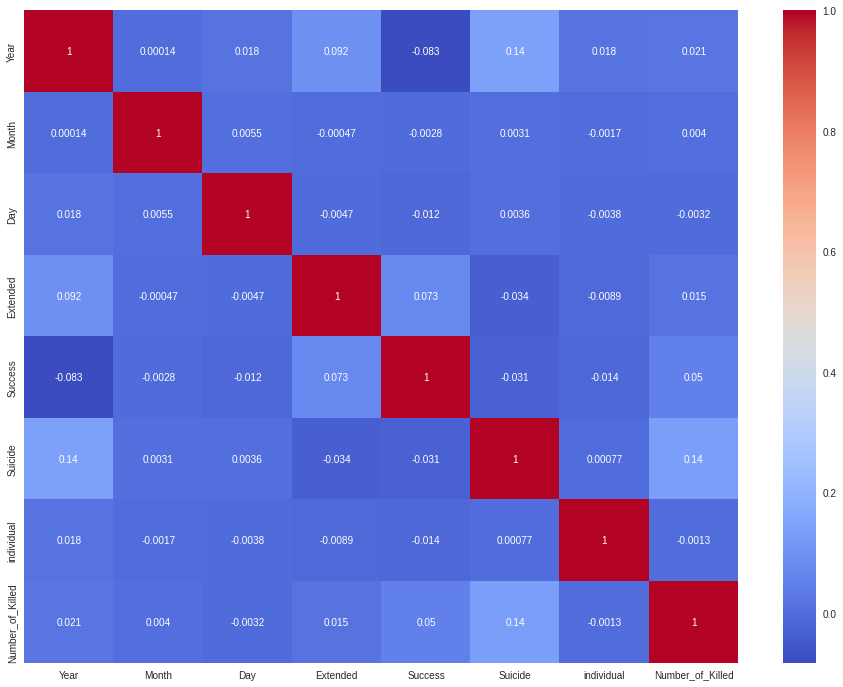

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(clean_df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

# **DATA VISUALIZATION**

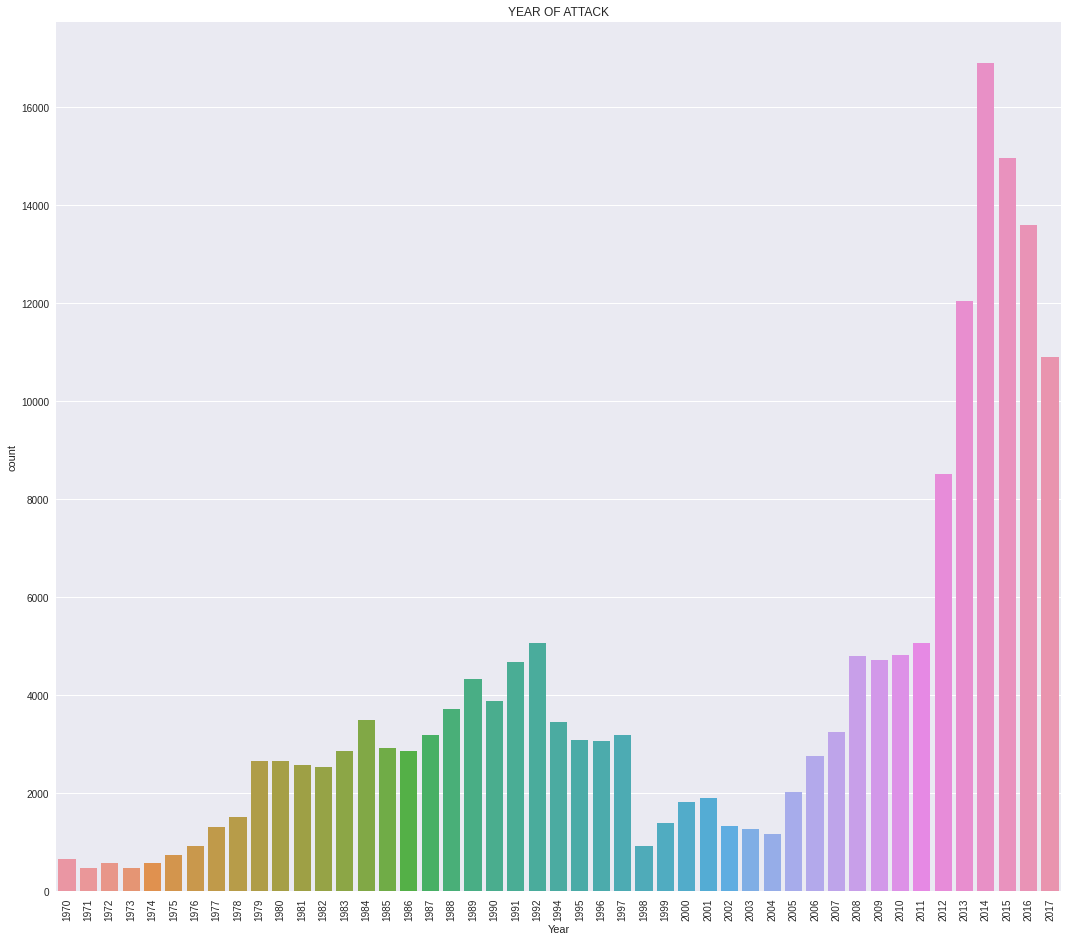

In [ ]:
#YEAR
plt.figure(figsize=(18,16))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Year'].sort_values(), data= df)
plt.title('YEAR OF ATTACK')
plt.show()

FROM THE CHAT WE CAN SEE AS THE YEAR GOES BY THE RATE OF GLOBAL TERRORISM INCREASED WITH YEAR 2014 RECORDING THE HIGHEST RATE OF GLOBAL TERRORISM WHILE YEAR 1971 WITH THE LEAST RECORDED GLOBAL TERRORISM

In [ ]:
#COUNTRY
country = pd.DataFrame(clean_df.groupby('Country')['Country'].size().sort_values(ascending=False))
country.columns = ['Count']
country_df = country.head(20)
country_df

,Count
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


Iraq,Pakistan,Afghanistan lead as the countries with the highest reported cases of global terrorism

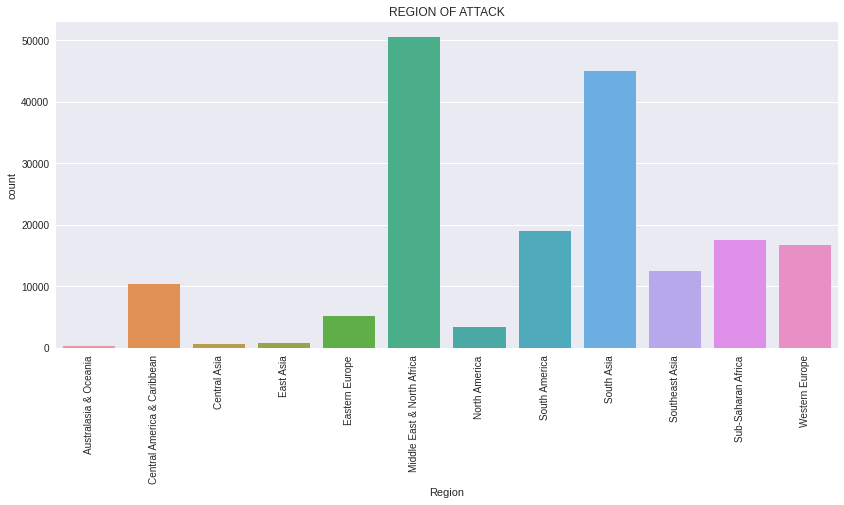

In [ ]:
#REGION
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Region'].sort_values(), data= df)
plt.title('REGION OF ATTACK')
plt.show()

The regions with the most occurence of global terrorism are Middle East& North Africa and South Asia While Australasia and Oceania is the least region with terrorism attack

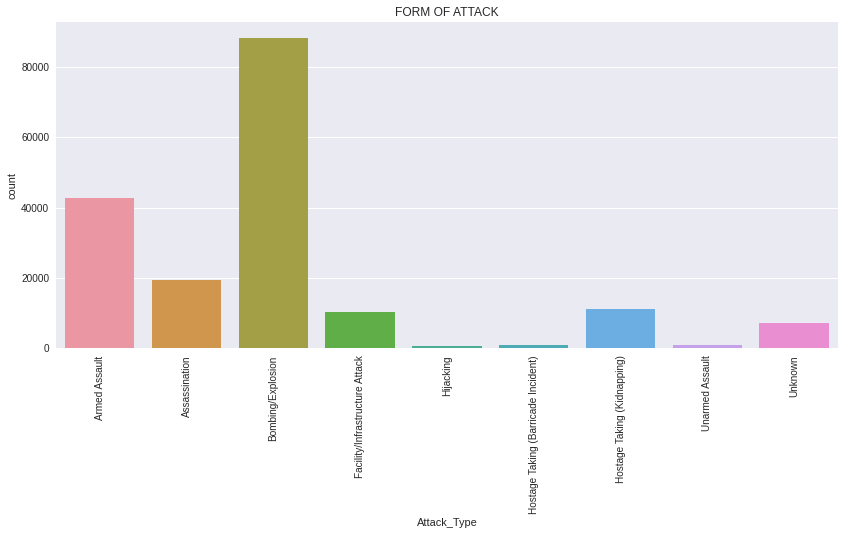

In [ ]:
#ATTACK TYPE
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Attack_Type'].sort_values(), data= df)
plt.title('FORM OF ATTACK')
plt.show()

The predominant form of attack in global terrorism has been carried out by the use of Bombing/Explosion followed by Armed Assault #While Hijacking has been the least form used

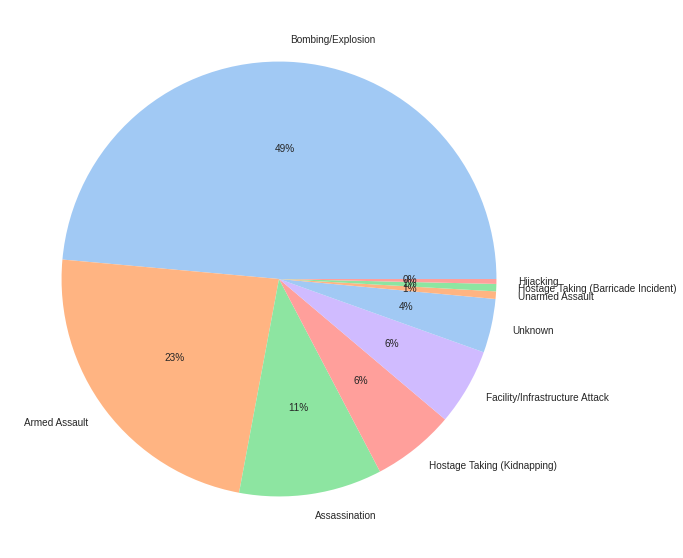

In [ ]:
#trying pie chart for attack type data
attack = pd.DataFrame(clean_df.groupby('Attack_Type')['Attack_Type'].size().sort_values(ascending=False))
attack.columns = ['Count']

labels = list(attack.index)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,10))
plt.pie(attack['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

The predominant form of attack in global terrorism has been carried out by the use of Bombing/Explosion (49%) followed by Armed Assault While Hijacking has been the least form used

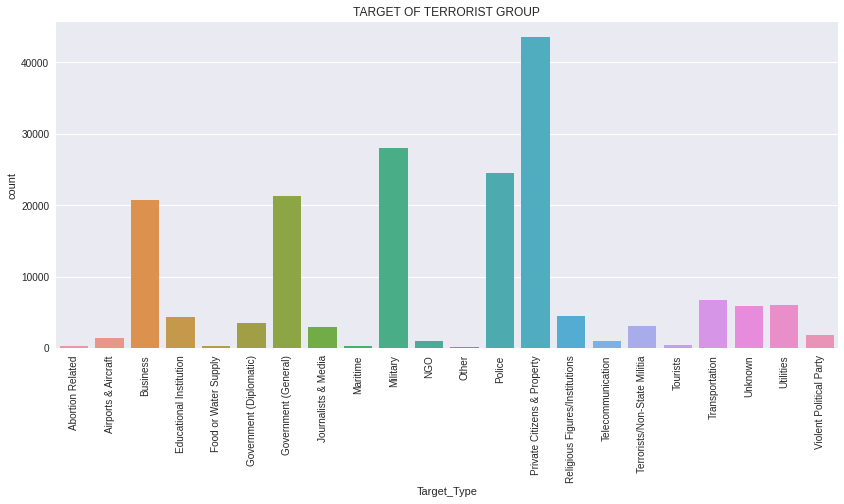

In [ ]:
#Target Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Target_Type'].sort_values(), data= df)
plt.title('TARGET OF TERRORIST GROUP')
plt.show()

The most targeted area of global terrorism has been Private Citizens & Property followed by the Military and the Police

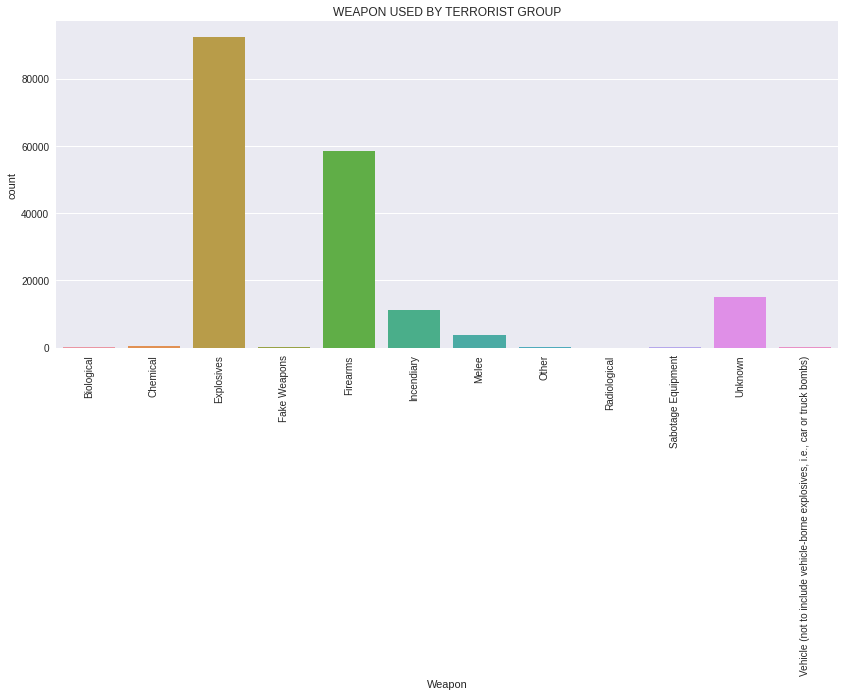

In [ ]:
#Weapon Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Weapon'].sort_values(), data= df)
plt.title('WEAPON USED BY TERRORIST GROUP')
plt.show()

Explosives and firearms constitute the most weapon used in global terrorism

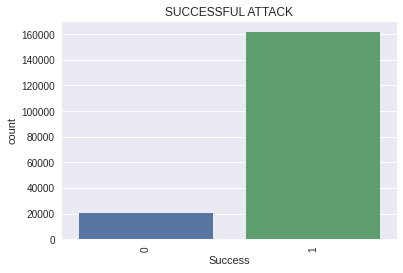

In [ ]:
#Success in Attack
plt.figure(figsize=(6,4))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Success'].sort_values(), data= df)
plt.title('SUCCESSFUL ATTACK')
plt.show()

In [ ]:
#Deaths Toll
No_Deaths = pd.DataFrame(clean_df.groupby('Number_of_Killed')['Region'].size().sort_values(ascending=True))
No_Deaths.columns = ['Count']
No_Deaths_df = No_Deaths.head(20)
No_Deaths_df

,Count
Number_of_Killed,
1570.0,1
212.0,1
210.0,1
208.0,1
205.0,1
188.0,1
184.0,1
171.0,1
168.0,1


The highest record of death during an attck has the figure as 1570

In [ ]:
No_Deaths = pd.DataFrame(clean_df.groupby('Region')['Number_of_Killed'].size().sort_values(ascending=True))
No_Deaths.columns = ['Count']
No_Deaths_df = No_Deaths.tail(10)
No_Deaths_df

,Count
Region,
East Asia,802
North America,3456
Eastern Europe,5144
Central America & Caribbean,10344
Southeast Asia,12485
Western Europe,16639
Sub-Saharan Africa,17550
South America,18978
South Asia,44974


Middle East& North Afican has recorded more cases of deaths from global terrorism followed by South Asia this also shows that the regions has had the highest occurence of global terrorism

In [ ]:
#clean dataset wthout preprocessing
clean_df.to_csv('clean_df.csv')

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Extended            181691 non-null  int64  
 4   Country             181691 non-null  object 
 5   Region              181691 non-null  object 
 6   City                181691 non-null  object 
 7   Success             181691 non-null  int64  
 8   Suicide             181691 non-null  int64  
 9   Attack_Type         181691 non-null  object 
 10  Target_Type         181691 non-null  object 
 11  individual          181691 non-null  int64  
 12  Nationality_target  181691 non-null  object 
 13  Attack_Group        181691 non-null  object 
 14  Weapon              181691 non-null  object 
 15  Number_of_Killed    181691 non-nul

# **STEP 2: FEATURE ENGINEERING (FEATURE SELECTION AND FEATURE SCALING)**

### Encoding data

In [ ]:
dff = clean_df.copy()

In [ ]:
X= dff.drop(['Success','City'],axis=1)
y= dff['Success']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

tree=ExtraTreesClassifier(n_estimators=10)
tree.fit(X,y)
feat_imp=pd.Series(tree.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
cat_cols=['Attack_Group','Weapon','Country','Region','Attack_Type','Target_Type', 'Nationality_target']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [ ]:
# Split dataset into a training and testing set.
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

ros = RandomOverSampler (random_state=2)
X_train, y_train = ros.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [ 13938 113245]

Number of observations in the target variable after oversampling of the minority class: [113245 113245]
